In [ ]:
import numpy as np
import pandas as pd

In [ ]:
data = pd.read_csv('/content/Cleaned_data.csv')

In [ ]:
data.head()

,facilities,advantages,BHK,avg_sba,Avg_prics,floors,units,tpa,towers,address
0,19.0,6.565000,2.0,1362.5,0.9749,14.0,908.0,9.625,8.0,"shamshabad,hyderabad"
1,19.0,6.565000,3.0,1652.5,1.2300,14.0,908.0,9.625,8.0,"shamshabad,hyderabad"
2,27.0,7.209091,3.0,2140.0,2.4000,44.0,856.0,5.060,2.0,"nanakramguda,hyderabad"
3,21.0,6.225000,2.0,1420.0,1.1800,16.0,352.0,2.240,1.0,"kondapur,hyderabad"
4,21.0,6.225000,3.0,1850.0,1.5350,16.0,352.0,2.240,1.0,"kondapur,hyderabad"


<Axes: xlabel='Avg_prics', ylabel='Count'>

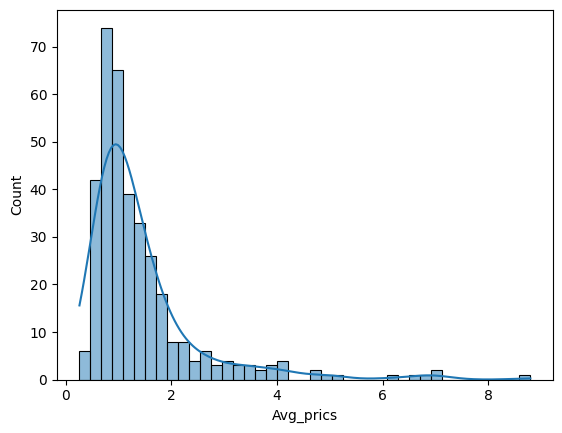

In [ ]:
import seaborn as sns
sns.histplot(data['Avg_prics'],kde=True)

In [ ]:
train_df = data.drop(columns='address')

<Axes: >

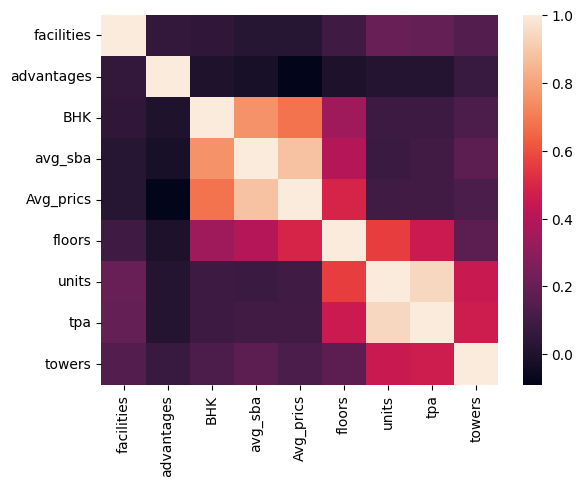

In [ ]:
import seaborn as sns
sns.heatmap(train_df.corr())

In [ ]:
train_df.corr()['Avg_prics'].sort_values(ascending=False)

Avg_prics     1.000000
avg_sba       0.884055
BHK           0.679293
floors        0.490663
towers        0.123517
tpa           0.099565
units         0.094856
facilities    0.024871
advantages   -0.089343
Name: Avg_prics, dtype: float64

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 361 entries, 0 to 360
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   facilities  361 non-null    float64
 1   advantages  361 non-null    float64
 2   BHK         361 non-null    float64
 3   avg_sba     361 non-null    float64
 4   Avg_prics   361 non-null    float64
 5   floors      361 non-null    float64
 6   units       361 non-null    float64
 7   tpa         361 non-null    float64
 8   towers      361 non-null    float64
 9   address     361 non-null    object 
dtypes: float64(9), object(1)
memory usage: 28.3+ KB


In [ ]:
from sklearn.preprocessing import OrdinalEncoder
encoded_data = data.copy()
cat_col = encoded_data.select_dtypes('object').columns

In [ ]:
cat_col[0]

'address'

In [ ]:
oe = OrdinalEncoder()
encoded_data[cat_col[0]] = oe.fit_transform(encoded_data[[cat_col[0]]])
print(oe.categories_)

[array(['ameerpet,hyderabad', 'aminpur,hyderabad', 'attapur,hyderabad',
       'bachupally,hyderabad', 'bahadurpally,hyderabad',
       'balanagar,hyderabad', 'begumpet,hyderabad', 'boduppal,hyderabad',
       'bowrampet,hyderabad', 'chandanagar,hyderabad', 'city,hyderabad',
       'district,hyderabad', 'gachibowli,hyderabad',
       'gajulramaram,hyderabad', 'gandimaisamma,hyderabad',
       'gopanpally,hyderabad', 'gundlapochampalli,hyderabad',
       'hayathnagar,hyderabad', 'hills,hyderabad', 'isnapur,hyderabad',
       'jagir,hyderabad', 'junction,hyderabad', 'kapra,hyderabad',
       'khairatabad,hyderabad', 'kismathpur,hyderabad',
       'kokapet,hyderabad', 'kollur,hyderabad', 'kompally,hyderabad',
       'kondapur,hyderabad', 'kukatpally,hyderabad', 'madhapur,hyderabad',
       'madinaguda,hyderabad', 'mallampet,hyderabad',
       'manikonda,hyderabad', 'miyapur,hyderabad', 'mokila,hyderabad',
       'nagar,hyderabad', 'nallagandla,hyderabad',
       'nanakramguda,hyderabad', 

In [ ]:
encoded_data.head()

,facilities,advantages,BHK,avg_sba,Avg_prics,floors,units,tpa,towers,address
0,19.0,6.565000,2.0,1362.5,0.9749,14.0,908.0,9.625,8.0,48.0
1,19.0,6.565000,3.0,1652.5,1.2300,14.0,908.0,9.625,8.0,48.0
2,27.0,7.209091,3.0,2140.0,2.4000,44.0,856.0,5.060,2.0,38.0
3,21.0,6.225000,2.0,1420.0,1.1800,16.0,352.0,2.240,1.0,28.0
4,21.0,6.225000,3.0,1850.0,1.5350,16.0,352.0,2.240,1.0,28.0


In [ ]:
X_label = encoded_data.drop(columns='Avg_prics').copy()
y_label = encoded_data['Avg_prics']

In [ ]:
X_label

,facilities,advantages,BHK,avg_sba,floors,units,tpa,towers,address
0,19.0,6.565000,2.0,1362.5,14.0,908.0,9.625000,8.0,48.0
1,19.0,6.565000,3.0,1652.5,14.0,908.0,9.625000,8.0,48.0
2,27.0,7.209091,3.0,2140.0,44.0,856.0,5.060000,2.0,38.0
3,21.0,6.225000,2.0,1420.0,16.0,352.0,2.240000,1.0,28.0
4,21.0,6.225000,3.0,1850.0,16.0,352.0,2.240000,1.0,28.0
...,...,...,...,...,...,...,...,...,...
356,25.0,7.869231,4.0,3166.0,15.0,238.0,4.100000,4.0,50.0
357,25.0,12.544444,2.0,1168.0,6.0,248.0,2.737577,4.0,3.0
358,25.0,12.544444,3.0,1560.0,6.0,248.0,2.737577,4.0,3.0
359,18.0,10.743846,2.0,1265.0,10.0,520.0,5.500000,6.0,52.0


In [ ]:
y_label

0      0.9749
1      1.2300
2      2.4000
3      1.1800
4      1.5350
        ...  
356    4.9900
357    0.6189
358    0.8266
359    0.9000
360    1.4600
Name: Avg_prics, Length: 361, dtype: float64

<Axes: >

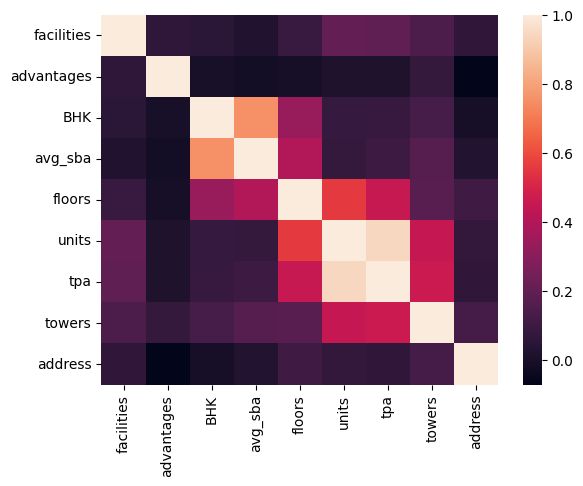

In [ ]:
sns.heatmap(X_label.corr())

In [ ]:
corr_df = encoded_data.corr()['Avg_prics'].sort_values(ascending=False).reset_index()

In [ ]:
corr_df = corr_df.rename(columns={'index':'feature','Avg_prics':'corr_imp'})

In [ ]:
corr_df

,feature,corr_imp
0,Avg_prics,1.000000
1,avg_sba,0.884055
2,BHK,0.679293
3,floors,0.490663
4,towers,0.123517
5,tpa,0.099565
6,units,0.094856
7,facilities,0.024871
8,address,-0.004037
9,advantages,-0.089343


# Random Forest for feature selection

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=100,random_state=42)
rf.fit(X_label,y_label)

RandomForestRegressor(random_state=42)

In [ ]:
rf_importanes = pd.DataFrame({'feature':X_label.columns,
              'Feature_importance':rf.feature_importances_}).sort_values(by='Feature_importance',ascending=False)

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
gbr = GradientBoostingRegressor()
gbr.fit(X_label,y_label)

GradientBoostingRegressor()

In [ ]:
gb_importanes = pd.DataFrame({'feature':X_label.columns,
              'gradient_importance':gbr.feature_importances_}).sort_values(by='gradient_importance',ascending=False)

In [ ]:
gb_importanes

,features,gradient_importance
3,avg_sba,0.814824
4,floors,0.059557
1,advantages,0.046051
2,BHK,0.025710
6,tpa,0.016980
5,units,0.015340
8,address,0.014016
7,towers,0.004406
0,facilities,0.003116


In [ ]:
from sklearn.inspection import permutation_importance
from sklearn.model_selection import train_test_split

In [ ]:
X_train_label,X_test_label,y_train_label,y_test_label = train_test_split(X_label,y_label,test_size=0.2,random_state=42)
rf1 = RandomForestRegressor(n_estimators=100,random_state=42)
rf1.fit(X_train_label,y_train_label)
perm_importance = permutation_importance(rf1,X_test_label,y_test_label,n_repeats=30,random_state=42)

In [ ]:
pm_importanes = pd.DataFrame({'feature':X_label.columns,
              'permutation_importance':perm_importance.importances_mean}).sort_values(by='permutation_importance',ascending=False)

In [ ]:
pm_importanes

,features,permutation_importance
3,avg_sba,1.241537
2,BHK,0.040462
4,floors,0.032201
1,advantages,0.020678
8,address,0.004082
0,facilities,-0.006686
5,units,-0.008864
7,towers,-0.010983
6,tpa,-0.011983


In [ ]:
from sklearn.feature_selection import RFE

# Initialize the base estimator
estimator = RandomForestRegressor()

# Apply RFE on the label-encoded and standardized training data
selector_label = RFE(estimator, n_features_to_select=X_label.shape[1], step=1)
selector_label = selector_label.fit(X_label, y_label)

# Get the selected features based on RFE
selected_features = X_label.columns[selector_label.support_]

# Extract the coefficients for the selected features from the underlying linear regression model
selected_coefficients = selector_label.estimator_.feature_importances_

# Organize the results into a DataFrame
RFE_importance = pd.DataFrame({
    'feature': selected_features,
    'rfe_score': selected_coefficients
}).sort_values(by='rfe_score', ascending=False)

RFE_importance

,feature,rfe_score
3,avg_sba,0.811255
4,floors,0.047831
1,advantages,0.045740
5,units,0.025093
2,BHK,0.023689
6,tpa,0.014502
8,address,0.013564
0,facilities,0.009769
7,towers,0.008558


In [ ]:
!pip install shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 538.2/538.2 kB 6.0 MB/s eta 0:00:00


In [ ]:
import shap

# Compute SHAP values using the trained Random Forest model
rf2 = RandomForestRegressor(n_estimators=100, random_state=42)
rf2.fit(X_label, y_label)

explainer = shap.TreeExplainer(rf2)
shap_values = explainer.shap_values(X_label)

# Summing the absolute SHAP values across all samples to get an overall measure of feature importance
shap_sum = np.abs(shap_values).mean(axis=0)

shap_values

array([[ 0.00440755,  0.05396795, -0.04440426, ...,  0.03027341,
         0.00520479,  0.00183287],
       [ 0.00355734,  0.06462266,  0.03249375, ...,  0.02902501,
         0.01030811,  0.01656468],
       [ 0.04015618,  0.08965456,  0.03775948, ...,  0.03685189,
        -0.00628715, -0.02218486],
       ...,
       [-0.00130794, -0.05481203,  0.02531513, ..., -0.00759959,
        -0.00570936,  0.00271066],
       [ 0.00524951, -0.03360899, -0.03375165, ...,  0.02018041,
        -0.00255317,  0.01259113],
       [ 0.00291287, -0.0137745 ,  0.00909194, ...,  0.015776  ,
        -0.00291091, -0.00173619]])

In [ ]:
shap_importances = pd.DataFrame({
    'feature': X_label.columns,
    'SHAP_score': np.abs(shap_values).mean(axis=0)
}).sort_values(by='SHAP_score', ascending=False)

shap_importances

,feature,SHAP_score
3,avg_sba,0.578672
4,floors,0.144177
2,BHK,0.066368
1,advantages,0.050962
5,units,0.023647
6,tpa,0.018838
8,address,0.017920
7,towers,0.011881
0,facilities,0.009247


In [ ]:
final_df = corr_df.merge(rf_importanes,on='feature').merge(pm_importanes,on='feature').merge(RFE_importance,on='feature').merge(shap_importances,on='feature')

In [ ]:
final_df.set_index('feature',inplace=True)

In [ ]:
final_df = final_df.divide(final_df.sum(axis=0), axis=1)

In [ ]:
final_df[['corr_imp','Feature_importance','permutation_importance','rfe_score','SHAP_score']].mean(axis=1).sort_values(ascending=False)

feature
avg_sba       0.717403
floors        0.097882
BHK           0.089304
advantages    0.024316
units         0.022131
tpa           0.016914
towers        0.015462
address       0.009609
facilities    0.006979
dtype: float64

In [ ]:
from sklearn.model_selection import cross_val_score
rf_m = RandomForestRegressor(n_estimators=100,random_state=42)
scores = cross_val_score(rf_m,X_label,y_label,cv=5,scoring='r2')

In [ ]:
scores.mean()

0.7647447967711359

In [ ]:
rf_m1 = rf_m = RandomForestRegressor(n_estimators=100,random_state=42)
scores1 = cross_val_score(rf_m,X_label.drop(columns=['address','facilities']),y_label,cv=5,scoring='r2')

In [ ]:
scores1.mean()

0.7733555649294448

In [ ]:
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X_label,y_label,test_size=0.2,random_state=42)

In [ ]:
sv = SVR(kernel='rbf')

In [ ]:
sv.fit(X_train,y_train)

SVR()

In [ ]:
scores = cross_val_score(sv,X_train,y_train,cv=5,scoring='r2')

In [ ]:
scores.mean()

0.6727197570663817

In [ ]:
y_pred = sv.predict(X_test)

In [ ]:
from sklearn.metrics import mean_absolute_error
print(mean_absolute_error(y_test,y_pred))

0.26244892167855605
